<a href="https://colab.research.google.com/github/drobe86/Health-Analytics/blob/main/Health_Analytics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HEALTH ANALYTICS FINAL PROJECT**

The purpose of this code notebook is to:

- clean BRFSS data into a useable format for machine learning alogrithms.
- create and train models to determine if an individual has one of several different chronic conditions

# **1. Background**
Chronic Conditions are a growing problem both financially and health-risk-wise ​

In 2016, the total costs in the U.S. for direct health care treatment for chronic health conditions totaled $1.1 trillion (Milken Institute)​

Chronic diseases are estimated to kill almost 41 million people a year worldwide, making up seven out of ten deaths globally. Of these deaths, approximately 17 million are classed as premature, with people dying significantly younger than expected on average (World Health Organization)​

​

https://milkeninstitute.org/report/costs-chronic-disease-us#:~:text=Key%20findings%3A,percent%20of%20the%20nation's%20GDP.

# **2. Data source**
We accessed publicly available 2015 BRFSS data, which contain 279 variables on 464,644 subjects. https://www.cdc.gov/brfss/annual_data/annual_2015.html


# **3. Dataset Considerations**
Features
## **The Dependent Variables are:**

- Do you have, or have you ever had (in the case of women who only have diabetes during pregnancy), diabetes? --> DIABETE3
- Do you have Coronary Heart Disease? --> CVDCRHD4
- Have you ever suffered a Stroke? --> CVDSTRK3
- Have you ever suffered a Heart Attack? --> CVDINFR4
- Do you have Kidney Disease? --> CHCKIDNY
## **The independent variables were:**
### High Blood Pressure
- Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional --> _RFHYPE5
### High Cholesterol
- Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? --> TOLDHI2
- Cholesterol check within past five years --> _CHOLCHK
### BMI
- Body Mass Index (BMI) --> _BMI5
### Smoking
- Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> SMOKE100
### Physical Activity
- Adults who reported doing physical activity or exercise during the past 30 days other than their regular job --> _TOTINDA
### Diet
- Consume Fruit 1 or more times per day --> _FRTLT1
- Consume Vegetables 1 or more times per day --> _VEGLT1
### Alcohol Consumption
- Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> _RFDRHV5
### Health Care
- Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> HLTHPLN1
- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> MEDCOST
### Health General and Mental Health
- Would you say that in general your health is: --> GENHLTH
- Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MENTHLTH
- Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PHYSHLTH
- Do you have serious difficulty walking or climbing stairs? --> DIFFWALK
### Demographics
- Indicate sex of respondent. --> SEX
- Fourteen-level age category --> _AGEG5YR
- What is the highest grade or year of school you completed? --> EDUCA
- Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") --> INCOME2

#### **Note: Variables that were used as dependent variables in some cases were also included as independent variables when modeling other chronic conditions

In [ ]:
import os
import pandas as pd
import numpy as np
import random
random.seed(1)

In [ ]:
year = '2015'
brfss_2015_dataset = pd.read_csv(f'{year}.csv')

In [ ]:
brfss_df_selected = brfss_2015_dataset[['DIABETE3', 'CVDINFR4',
                                        'CVDCRHD4', 'CVDSTRK3',
                                        'CHCKIDNY',
                                         '_RFHYPE5',  
                                         'TOLDHI2', '_CHOLCHK', 
                                         '_BMI5', 
                                         'SMOKE100',  
                                         '_TOTINDA', 
                                         '_FRTLT1', '_VEGLT1', 
                                         '_RFDRHV5', 
                                         'HLTHPLN1', 'MEDCOST', 
                                         'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 
                                         'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2' ]]

In [ ]:
brfss_df_selected.shape

(5055, 24)

In [ ]:
brfss_df_selected.head()

,DIABETE3,CVDINFR4,CVDCRHD4,CVDSTRK3,CHCKIDNY,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,4018.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,5.0,18.0,15.0,1.0,2.0,9.0,4.0,3.0
1,3.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2509.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,3.0,88.0,88.0,2.0,2.0,7.0,6.0,1.0
2,3.0,7.0,2.0,1.0,2.0,1.0,1.0,1.0,2204.0,NaN,9.0,9.0,9.0,9.0,1.0,2.0,4.0,88.0,15.0,NaN,2.0,11.0,4.0,99.0
3,3.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2819.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,5.0,30.0,30.0,1.0,2.0,9.0,4.0,8.0
4,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2437.0,2.0,2.0,9.0,1.0,1.0,1.0,2.0,5.0,88.0,20.0,2.0,2.0,9.0,5.0,77.0


# **4. Clean the data**

## 4.1 Drop missing values

In [ ]:
brfss_df_selected = brfss_df_selected.dropna()
brfss_df_selected.shape

(4117, 24)

## 4.2 Modify and clean the values to be more suitable to ML algorithms
In order to do this we referenced the codebook which says what each column/feature/question is: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [ ]:
# DIABETE3
# Making this ordinal. 0 for no diabetes or only during pregnancy, 1 for pre-diabetes or borderline diabetes, 2 for diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['DIABETE3'] = brfss_df_selected['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE3 != 9]
brfss_df_selected.DIABETE3.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([0., 2., 1.])

In [ ]:
# CVDINFR4
# Change 2 to 0 so it represents no heart attack
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['CVDINFR4'] = brfss_df_selected['CVDINFR4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDINFR4 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDINFR4 != 9]
brfss_df_selected.CVDINFR4.unique()

array([0., 1.])

In [ ]:
# CVDCRHD4
# Change 2 to 0 so it represents no heart disease
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['CVDCRHD4'] = brfss_df_selected['CVDCRHD4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDCRHD4 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDCRHD4 != 9]
brfss_df_selected.CVDCRHD4.unique()

array([0., 1.])

In [ ]:
# CHCKIDNY
# Change 2 to 0 so it represents no kidney disease
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['CHCKIDNY'] = brfss_df_selected['CHCKIDNY'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHCKIDNY != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHCKIDNY != 9]
brfss_df_selected.CHCKIDNY.unique()

array([0., 1.])

In [ ]:
# _RFHYPE5
#Change 1 to 0 so it represents No high blood pressure and 2 to 1 so it represents high blood pressure
brfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE5 != 9]
brfss_df_selected._RFHYPE5.unique()

array([1., 0.])

In [ ]:
# TOLDHI2
# Change 2 to 0 so it represents no high cholesterol
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['TOLDHI2'] = brfss_df_selected['TOLDHI2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI2 != 9]
brfss_df_selected.TOLDHI2.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([1., 0.])

In [ ]:
# _CHOLCHK
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
brfss_df_selected['_CHOLCHK'] = brfss_df_selected['_CHOLCHK'].replace({3:0,2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCHK != 9]
brfss_df_selected._CHOLCHK.unique()

array([1., 0.])

In [ ]:
# _BMI5 
# Divide values by 100, as the survey dataset includes BMI values * 100
brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
brfss_df_selected._BMI5.unique()

array([40., 25., 28., 24., 27., 30., 26., 23., 34., 33., 21., 22., 31.,
       38., 20., 19., 32., 46., 41., 37., 36., 29., 35., 18., 54., 45.,
       39., 47., 43., 55., 49., 42., 17., 16., 48., 44., 50., 59., 15.,
       52., 53., 57., 51., 14., 58., 63., 61.])

In [ ]:
# SMOKE100
# Change 2 to 0 so it represents no smoking
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
brfss_df_selected.SMOKE100.unique()

array([1., 0.])

In [ ]:
# CVDSTRK3
# Change 2 to 0 so it represents no stroke
# Remove all 7 (dont knows)
# Remove all 9 (refused)
brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
brfss_df_selected.CVDSTRK3.unique()

array([0., 1.])

In [ ]:
# _TOTINDA
# change 2 to 0 so it represents no physical activity
# Remove all 9 (don't know/refused)
brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
brfss_df_selected._TOTINDA.unique()

array([0., 1.])

In [ ]:
# _FRTLT1
# Change 2 to 0 for no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day 
# remove all dont knows and missing 9
brfss_df_selected['_FRTLT1'] = brfss_df_selected['_FRTLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._FRTLT1 != 9]
brfss_df_selected._FRTLT1.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([0., 1.])

In [ ]:
# _VEGLT1
# Change 2 to 0 for no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day 
# remove all dont knows and missing 9
brfss_df_selected['_VEGLT1'] = brfss_df_selected['_VEGLT1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._VEGLT1 != 9]
brfss_df_selected._VEGLT1.unique()

array([1., 0.])

In [ ]:
# _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
brfss_df_selected['_RFDRHV5'] = brfss_df_selected['_RFDRHV5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFDRHV5 != 9]
brfss_df_selected._RFDRHV5.unique()

array([0., 1.])

In [ ]:
# HLTHPLN1
# Change 2 to 0 because it represents no health care access
# remove 7 and 9 for don't know or refused
brfss_df_selected['HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.HLTHPLN1 != 9]
brfss_df_selected.HLTHPLN1.unique()

array([1., 0.])

In [ ]:
# MEDCOST
# Change 2 to 0 because it represents no doctor because of cost constraints
# remove 7 for don/t know and 9 for refused
brfss_df_selected['MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST != 9]
brfss_df_selected.MEDCOST.unique()

array([0., 1.])

In [ ]:
# GENHLTH
# Ordinal variable (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 9]
brfss_df_selected.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

In [ ]:
# MENTHLTH
# Measured in days/month, 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 99]
brfss_df_selected.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27.])

In [ ]:
# PHYSHLTH
# Measured in days/month, 0-30
# change 88 to 0 because it means none (no physical health days)
# remove 77 and 99 for don't know not sure and refused
brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 99]
brfss_df_selected.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13.])

In [ ]:
# DIFFWALK
# change 2 to 0 for no
# remove 7 and 9 for don't know not sure and refused
brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 9]
brfss_df_selected.DIFFWALK.unique()

array([1., 0.])

In [ ]:
# SEX
# Male is 1, female is 0
brfss_df_selected['SEX'] = brfss_df_selected['SEX'].replace({2:0})
brfss_df_selected.SEX.unique()

array([0., 1.])

In [ ]:
# _AGEG5YR
# Ordinal, 1 is 18-24, 13 is 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
brfss_df_selected._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [ ]:
# EDUCA
# Ordinal, 1 being never attended school or kindergarten only, 6 being college 4 years or more
# Remove 9 for refused:
brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
brfss_df_selected.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [ ]:
# INCOME2
# Ordinal, 1 being less than $10,000, 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 99]
brfss_df_selected.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [ ]:
brfss_df_selected.shape

(2774, 24)

In [ ]:
brfss_df_selected.head()

,DIABETE3,CVDINFR4,CVDCRHD4,CVDSTRK3,CHCKIDNY,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,_TOTINDA,_FRTLT1,_VEGLT1,_RFDRHV5,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#Check Class Sizes of the diabetes column
#will need to use SMOTE for balance of the data set. Also to remove type 1 diabetes
brfss_df_selected.groupby(['DIABETE3']).size()

DIABETE3
0.0    2151
1.0      49
2.0     574
dtype: int64

In [ ]:
#Rename the columns
brfss = brfss_df_selected.rename(columns = {'DIABETE3':'Diabetes_012',
                                         'CVDINFR4':'HeartAttack',
                                         'CVDCRHD4':'CoronaryHeartDisease',
                                         'CHCKIDNY':'KidneyDisease',
                                         '_RFHYPE5':'HighBP',  
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck', 
                                         '_BMI5':'BMI', 
                                         'SMOKE100':'Smoker', 
                                         'CVDSTRK3':'Stroke', 
                                         '_TOTINDA':'PhysActivity', 
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies", 
                                         '_RFDRHV5':'HvyAlcoholConsump', 
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost', 
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk', 
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

In [ ]:
brfss.head()

,Diabetes_012,HeartAttack,CoronaryHeartDisease,Stroke,KidneyDisease,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
brfss.shape

(2774, 24)

# **5. Create Binary Dataset for diabetes vs. no diabetes**
If we want to do binary classification of diabtes vs no diabetes that can be accomplished by either joining the prediabetics with the diabetics, with the non-diabetics, or removing them entirely.

We can start by adding them to the diabetic group, as being told by a doctor you are prediabetic is an indication of diabetes risk and ultimately we are interested in risk.

We need to also use SMOTE to help with the class imbalance

Note that because it is a survey it is always possible (actually likely) that some individuals will not have been diagnosed yet but are either pre-diabetic or diabetic.

In [ ]:
brfss_binary = brfss
#Change the diabetics 2 to a 1 and pre-diabetics 1 to a 0, so 0 means non-diabetic and pre-diabetic and 1 means diabetic
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({1:0})
brfss_binary['Diabetes_012'] = brfss_binary['Diabetes_012'].replace({2:1})

brfss_binary = brfss_binary.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
brfss_binary.Diabetes_binary.unique()

array([0., 1.])

In [ ]:
brfss_binary.head()

,Diabetes_binary,HeartAttack,CoronaryHeartDisease,Stroke,KidneyDisease,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
brfss_binary.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    2200
1.0     574
dtype: int64

## **5.1. Train Test Split - Stratified Sampling**
Stratified sampling is a solution to this. Stratified sampling will force the same class balance on the train and test dataset as the original data. You can do stratified sampling using scikitlearn’s train_test_split as follows:

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(brfss_binary, test_size = 0.3, stratify=brfss_binary.Diabetes_binary)

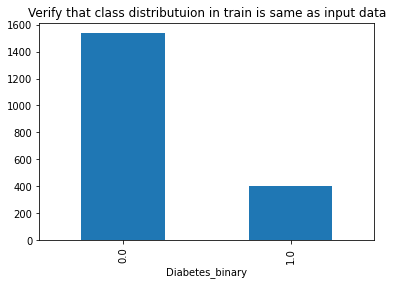

In [ ]:
train.pivot_table(index='Diabetes_binary', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')

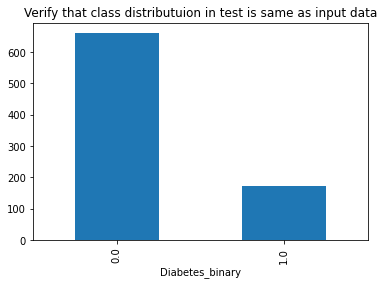

In [ ]:
test.pivot_table(index='Diabetes_binary', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in test is same as input data')

# **6. Benchmark Model**

In [ ]:
#Using this as our benchmark before SMOTE
from sklearn.linear_model import LogisticRegression

#X Y Split
X_train = train.drop('Diabetes_binary', axis = 1)
y_train = train.Diabetes_binary

X_test = test.drop('Diabetes_binary', axis = 1)
y_test = test.Diabetes_binary


lrmodel = LogisticRegression()

lrmodel.fit(X_train, y_train)

lrpreds = lrmodel.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  637 
False positives:  24 
False negatives:  148 
True Positives:  24


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lrpreds))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       661
         1.0       0.50      0.14      0.22       172

    accuracy                           0.79       833
   macro avg       0.66      0.55      0.55       833
weighted avg       0.75      0.79      0.74       833



In [ ]:
from sklearn.metrics import brier_score_loss
lrprobs = lrmodel.predict_proba(X_test)
lrprobs = lrprobs[:, 1]
lrloss = brier_score_loss(y_test, lrprobs)
print("brier score:", lrloss)

brier score: 0.14654481507348363


# **7. SMOTE**
In tabular data, you could think about adding small random noise to the values so that they are slightly different from the original. You can also create synthetic data based on the original data.

SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points. SMOTE can be seen as an advanced version of oversampling, or as a specific algorithm for data augmentation. The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.

The SMOTE algorithm works as follows:

- You draw a random sample from the minority class.
- For the observations in this sample, you will identify the k nearest neighbors.
- You will then take one of those neighbors and identify the vector between the current data point and the selected neighbor.
- You multiply the vector by a random number between 0 and 1.
- To obtain the synthetic data point, you add this to the current data point.

This operation is actually very much like slightly moving the data point in the direction of its neighbor. This way, you make sure that your synthetic data point is not an exact copy of an existing data point while making sure that it is also not too different from the known observations in your minority class.

Using SMOTE we can tweak the model to reduce false negatives, at the cost of increasing false positives. The result of using SMOTE is generally an increase in recall, at the cost of lower precision. This means that we will add more predictions of the minority class: some of them correct (increasing recall), but some of them wrong (decreasing precision).

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

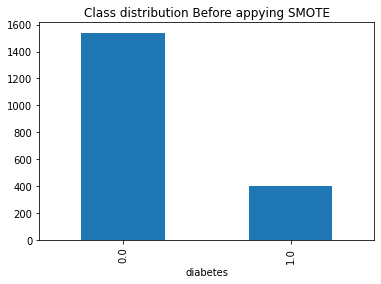

In [ ]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution Before appying SMOTE', xlabel='diabetes')

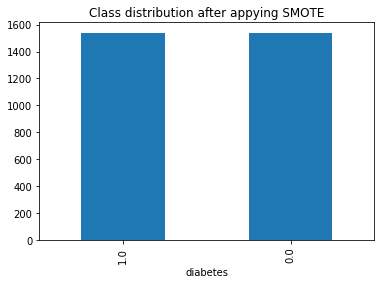

In [ ]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='diabetes')

In [ ]:
# Instantiate the new Logistic Regression
lrmodel2 = LogisticRegression()

# Fit the model with the data that has been resampled with SMOTE
lrmodel2.fit(X_resampled, y_resampled)

# Predict on the test set (not resampled to obtain honest evaluation)
lrpreds2 = lrmodel2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  444 
False positives:  217 
False negatives:  57 
True positives:  115


In [ ]:
#Here we can see the overall accuracy went down, but our recall percentage for the minority class went up a ton

print(classification_report(y_test, lrpreds2))

              precision    recall  f1-score   support

         0.0       0.89      0.67      0.76       661
         1.0       0.35      0.67      0.46       172

    accuracy                           0.67       833
   macro avg       0.62      0.67      0.61       833
weighted avg       0.77      0.67      0.70       833



In [ ]:
lrprobs2 = lrmodel2.predict_proba(X_test)
lrprobs2 = lrprobs2[:, 1]
lrloss2 = brier_score_loss(y_test, lrprobs2)
print("brier score:", lrloss2)

brier score: 0.20411651904805153


## **7.1 Summary Of Smote**
- Recall of invidivuals without diabetes went down from 0.97 to 0.72: there are more individuals without diabetes that we did not succeed to find
- Recall of individuals with diabetes went up from 0.17 to 0.75: we succeeded to identify many more individuals with diabetes
- The precision of individuals with diabetes went down from 0.52 to 0.31: the cost of correctly identifying more individuals with diabetes is that we now also incorrectly identify more individuals with diabetes (identifying individuals without diabetes as having diabetes)
- The Brier Score increased from 0.098 to 0.180: The assigned probability of each patient having diabetes decreased in accuracy when comparing to the binary diabetes outcome

# 8. Modeling Diabetes prediction using different modeling techniques, utilizing both the original dataset and Smote dataset

## 8.1 Modeling Diabetes prediction with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modeling with Original Dataset
X_train = train.drop('Diabetes_binary', axis = 1)
y_train = train.Diabetes_binary

X_test = test.drop('Diabetes_binary', axis = 1)
y_test = test.Diabetes_binary


rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)

rfpreds = rfmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, rfpreds))

rfprobs = rfmodel.predict_proba(X_test)
rfprobs = rfprobs[:, 1]
rfloss = brier_score_loss(y_test, rfprobs)
print("brier score:", rfloss)


important_features = pd.Series(data=rfmodel.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)


True negatives:  633 
False positives:  28 
False negatives:  145 
True Positives:  27
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       661
         1.0       0.49      0.16      0.24       172

    accuracy                           0.79       833
   macro avg       0.65      0.56      0.56       833
weighted avg       0.75      0.79      0.75       833

brier score: 0.14820996398559425
feature importances:
 BMI                     0.161645
Age                     0.115217
Income                  0.088654
GenHlth                 0.074081
PhysHlth                0.071559
Education               0.069469
MentHlth                0.057563
HighBP                  0.042734
DiffWalk                0.036967
HighChol                0.035326
Smoker                  0.032166
Sex                     0.029844
PhysActivity            0.029149
Fruits                  0.028759
Veggies                 0.026583
CoronaryHeartDisease    0.018098
Str

In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

rfmodel2 = RandomForestClassifier()

rfmodel2.fit(X_resampled, y_resampled)

rfpreds2 = rfmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, rfpreds2))

rfprobs2 = rfmodel2.predict_proba(X_test)
rfprobs2 = rfprobs2[:, 1]
rfloss2 = brier_score_loss(y_test, rfprobs2)
print("brier score:", rfloss2)

important_features = pd.Series(data=rfmodel2.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  615 
False positives:  46 
False negatives:  143 
True positives:  29
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87       661
         1.0       0.39      0.17      0.23       172

    accuracy                           0.77       833
   macro avg       0.60      0.55      0.55       833
weighted avg       0.72      0.77      0.74       833

brier score: 0.154584393757503
feature importances:
 HighBP                  0.114527
HighChol                0.106232
BMI                     0.099961
GenHlth                 0.088458
Age                     0.087548
Income                  0.064420
DiffWalk                0.061524
PhysActivity            0.050789
Education               0.050016
Smoker                  0.040143
PhysHlth                0.037773
Fruits                  0.035081
Sex                     0.031003
MentHlth                0.029395
Veggies                 0.025642
CoronaryHeartDisease    0.017501
NoDoc

## 8.2 Modeling Diabetes Prediction with a Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

# Modeling with Original Dataset
X_train = train.drop('Diabetes_binary', axis = 1)
y_train = train.Diabetes_binary

X_test = test.drop('Diabetes_binary', axis = 1)
y_test = test.Diabetes_binary


MLPmodel = MLPClassifier()

MLPmodel.fit(X_train, y_train)

MLPpreds = MLPmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, MLPpreds))

MLPprobs = MLPmodel.predict_proba(X_test)
MLPprobs = MLPprobs[:, 1]
MLPloss = brier_score_loss(y_test, MLPprobs)
print("brier score:", MLPloss)

True negatives:  593 
False positives:  68 
False negatives:  122 
True Positives:  50
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       661
         1.0       0.42      0.29      0.34       172

    accuracy                           0.77       833
   macro avg       0.63      0.59      0.60       833
weighted avg       0.75      0.77      0.76       833

brier score: 0.15631478676961122


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

MLPmodel2 = MLPClassifier()

MLPmodel2.fit(X_resampled, y_resampled)

MLPpreds2 = MLPmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, MLPpreds2))

MLPprobs2 = MLPmodel2.predict_proba(X_test)
MLPprobs2 = MLPprobs2[:, 1]
MLPloss2 = brier_score_loss(y_test, MLPprobs2)
print("brier score:", MLPloss2)

True negatives:  504 
False positives:  157 
False negatives:  96 
True positives:  76
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80       661
         1.0       0.33      0.44      0.38       172

    accuracy                           0.70       833
   macro avg       0.58      0.60      0.59       833
weighted avg       0.73      0.70      0.71       833

brier score: 0.19709913605008325


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## 8.3 Modeling Diabetes Prediction with a Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

# Modeling with Original Dataset
X_train = train.drop('Diabetes_binary', axis = 1)
y_train = train.Diabetes_binary

X_test = test.drop('Diabetes_binary', axis = 1)
y_test = test.Diabetes_binary


SVCmodel = SVC(probability=True)

SVCmodel.fit(X_train, y_train)

SVCpreds = SVCmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, SVCpreds))

SVCprobs = SVCmodel.predict_proba(X_test)
SVCprobs = SVCprobs[:, 1]
SVCloss = brier_score_loss(y_test, SVCprobs)
print("brier score:", SVCloss)

True negatives:  659 
False positives:  2 
False negatives:  170 
True Positives:  2
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       661
         1.0       0.50      0.01      0.02       172

    accuracy                           0.79       833
   macro avg       0.65      0.50      0.45       833
weighted avg       0.73      0.79      0.71       833

brier score: 0.16227462296240455


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

SVCmodel2 = SVC(probability=True)

SVCmodel2.fit(X_resampled, y_resampled)

SVCpreds2 = SVCmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, SVCpreds2))

SVCprobs2 = SVCmodel2.predict_proba(X_test)
SVCprobs2 = SVCprobs2[:, 1]
SVCloss2 = brier_score_loss(y_test, SVCprobs2)
print("brier score:", SVCloss2)

True negatives:  399 
False positives:  262 
False negatives:  41 
True positives:  131
              precision    recall  f1-score   support

         0.0       0.91      0.60      0.72       661
         1.0       0.33      0.76      0.46       172

    accuracy                           0.64       833
   macro avg       0.62      0.68      0.59       833
weighted avg       0.79      0.64      0.67       833

brier score: 0.2036951765011945


## 8.4 Modeling Diabetes prediction using K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Modeling with Original Dataset
X_train = train.drop('Diabetes_binary', axis = 1)
y_train = train.Diabetes_binary

X_test = test.drop('Diabetes_binary', axis = 1)
y_test = test.Diabetes_binary


knmodel = KNeighborsClassifier()

knmodel.fit(X_train, y_train)

knpreds = knmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, knpreds))

knprobs = knmodel.predict_proba(X_test)
knprobs = knprobs[:, 1]
knloss = brier_score_loss(y_test, knprobs)
print("brier score:", knloss)

True negatives:  609 
False positives:  52 
False negatives:  139 
True Positives:  33
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       661
         1.0       0.39      0.19      0.26       172

    accuracy                           0.77       833
   macro avg       0.60      0.56      0.56       833
weighted avg       0.73      0.77      0.74       833

brier score: 0.17517406962785115


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

knmodel2 = KNeighborsClassifier()

knmodel2.fit(X_resampled, y_resampled)

knpreds2 = knmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, knpreds2))

knprobs2 = knmodel2.predict_proba(X_test)
knprobs2 = knprobs2[:, 1]
knloss2 = brier_score_loss(y_test, knprobs2)
print("brier score:", knloss2)


True negatives:  401 
False positives:  260 
False negatives:  73 
True positives:  99
              precision    recall  f1-score   support

         0.0       0.85      0.61      0.71       661
         1.0       0.28      0.58      0.37       172

    accuracy                           0.60       833
   macro avg       0.56      0.59      0.54       833
weighted avg       0.73      0.60      0.64       833

brier score: 0.2732292917166867


## 8.5 Modeling Diabetes prediction using a Gaussian Process Classifier

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

# Modeling with Original Dataset
X_train = train.drop('Diabetes_binary', axis = 1)
y_train = train.Diabetes_binary

X_test = test.drop('Diabetes_binary', axis = 1)
y_test = test.Diabetes_binary


gpmodel = GaussianProcessClassifier()

gpmodel.fit(X_train, y_train)

gppreds = gpmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, gppreds))

gpprobs = gpmodel.predict_proba(X_test)
gpprobs = gpprobs[:, 1]
gploss = brier_score_loss(y_test, gpprobs)
print("brier score:", gploss)

True negatives:  599 
False positives:  62 
False negatives:  137 
True Positives:  35
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       661
         1.0       0.36      0.20      0.26       172

    accuracy                           0.76       833
   macro avg       0.59      0.55      0.56       833
weighted avg       0.72      0.76      0.73       833

brier score: 0.22959366759775227


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

gpmodel2 = GaussianProcessClassifier()

gpmodel2.fit(X_resampled, y_resampled)

gppreds2 = gpmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, gppreds2))

gpprobs2 = gpmodel2.predict_proba(X_test)
gpprobs2 = gpprobs2[:, 1]
gploss2 = brier_score_loss(y_test, gpprobs2)
print("brier score:", gploss2)

True negatives:  479 
False positives:  182 
False negatives:  97 
True positives:  75
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       661
         1.0       0.29      0.44      0.35       172

    accuracy                           0.67       833
   macro avg       0.56      0.58      0.56       833
weighted avg       0.72      0.67      0.69       833

brier score: 0.23700204663445737


## 8.6 Modeling Diabetes Prediction using an AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Modeling with Original Dataset
X_train = train.drop('Diabetes_binary', axis = 1)
y_train = train.Diabetes_binary

X_test = test.drop('Diabetes_binary', axis = 1)
y_test = test.Diabetes_binary


ABmodel = AdaBoostClassifier()

ABmodel.fit(X_train, y_train)

ABpreds = ABmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, ABpreds))

ABprobs = ABmodel.predict_proba(X_test)
ABprobs = ABprobs[:, 1]
ABloss = brier_score_loss(y_test, ABprobs)
print("brier score:", ABloss)

True negatives:  620 
False positives:  41 
False negatives:  137 
True Positives:  35
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87       661
         1.0       0.46      0.20      0.28       172

    accuracy                           0.79       833
   macro avg       0.64      0.57      0.58       833
weighted avg       0.74      0.79      0.75       833

brier score: 0.23996508060279756


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

ABmodel2 = AdaBoostClassifier()

ABmodel2.fit(X_resampled, y_resampled)

ABpreds2 = ABmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, ABpreds2))

ABprobs2 = ABmodel2.predict_proba(X_test)
ABprobs2 = ABprobs2[:, 1]
ABloss2 = brier_score_loss(y_test, ABprobs2)
print("brier score:", ABloss2)

True negatives:  588 
False positives:  73 
False negatives:  120 
True positives:  52
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       661
         1.0       0.42      0.30      0.35       172

    accuracy                           0.77       833
   macro avg       0.62      0.60      0.60       833
weighted avg       0.74      0.77      0.75       833

brier score: 0.24313979777881065


# 9. Performing the above modeling steps, but instead using Coronary Heart Disease as the target variable

## 9.1 Modeling Heart Disease using Logistic Regression

In [ ]:
train, test = train_test_split(brfss_binary, test_size = 0.3, stratify=brfss_binary.CoronaryHeartDisease)

#X Y Split
X_train = train.drop('CoronaryHeartDisease', axis = 1)
y_train = train.CoronaryHeartDisease

X_test = test.drop('CoronaryHeartDisease', axis = 1)
y_test = test.CoronaryHeartDisease


lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lrpreds = lrmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  760 
False positives:  5 
False negatives:  60 
True Positives:  8


In [ ]:
print(classification_report(y_test, lrpreds))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       765
         1.0       0.62      0.12      0.20        68

    accuracy                           0.92       833
   macro avg       0.77      0.56      0.58       833
weighted avg       0.90      0.92      0.90       833



In [ ]:
lrprobs = lrmodel.predict_proba(X_test)
lrprobs = lrprobs[:, 1]
lrloss = brier_score_loss(y_test, lrprobs)
print("brier score:", lrloss)

brier score: 0.06441022963797334


In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
lrmodel2 = LogisticRegression()
lrmodel2.fit(X_resampled, y_resampled)

lrpreds2 = lrmodel2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  599 
False positives:  166 
False negatives:  26 
True positives:  42


In [ ]:
print(classification_report(y_test, lrpreds2))

              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86       765
         1.0       0.20      0.62      0.30        68

    accuracy                           0.77       833
   macro avg       0.58      0.70      0.58       833
weighted avg       0.90      0.77      0.82       833



In [ ]:
lrprobs2 = lrmodel2.predict_proba(X_test)
lrprobs2 = lrprobs2[:, 1]
lrloss2 = brier_score_loss(y_test, lrprobs2)
print("brier score:", lrloss2)

brier score: 0.16405104602564544


## 9.2 Modeling Heart Disease prediction with Random Forest

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('CoronaryHeartDisease', axis = 1)
y_train = train.CoronaryHeartDisease

X_test = test.drop('CoronaryHeartDisease', axis = 1)
y_test = test.CoronaryHeartDisease


rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)

rfpreds = rfmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, rfpreds))

rfprobs = rfmodel.predict_proba(X_test)
rfprobs = rfprobs[:, 1]
rfloss = brier_score_loss(y_test, rfprobs)
print("brier score:", rfloss)

important_features = pd.Series(data=rfmodel.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  761 
False positives:  4 
False negatives:  65 
True Positives:  3
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       765
         1.0       0.43      0.04      0.08        68

    accuracy                           0.92       833
   macro avg       0.67      0.52      0.52       833
weighted avg       0.88      0.92      0.89       833

brier score: 0.06785690276110444
feature importances:
 BMI                  0.122672
HeartAttack          0.103517
Age                  0.092411
Income               0.088524
PhysHlth             0.072677
GenHlth              0.072291
Education            0.061489
MentHlth             0.054722
Stroke               0.035708
HighChol             0.029786
Fruits               0.029666
Diabetes_binary      0.029314
Smoker               0.029013
PhysActivity         0.028758
Veggies              0.027972
DiffWalk             0.027735
HighBP               0.025028
Sex                  0.0

In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

rfmodel2 = RandomForestClassifier()

rfmodel2.fit(X_resampled, y_resampled)

rfpreds2 = rfmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, rfpreds2))

rfprobs2 = rfmodel2.predict_proba(X_test)
rfprobs2 = rfprobs2[:, 1]
rfloss2 = brier_score_loss(y_test, rfprobs2)
print("brier score:", rfloss2)

important_features = pd.Series(data=rfmodel2.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  755 
False positives:  10 
False negatives:  55 
True positives:  13
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       765
         1.0       0.57      0.19      0.29        68

    accuracy                           0.92       833
   macro avg       0.75      0.59      0.62       833
weighted avg       0.90      0.92      0.90       833

brier score: 0.06796506602641056
feature importances:
 HeartAttack          0.142519
HighChol             0.129802
HighBP               0.091394
GenHlth              0.074026
Age                  0.056948
DiffWalk             0.055304
Diabetes_binary      0.050638
Smoker               0.044774
Veggies              0.043242
PhysActivity         0.040051
BMI                  0.037868
Education            0.033567
Income               0.033078
Fruits               0.032660
PhysHlth             0.030586
Stroke               0.029744
Sex                  0.028754
MentHlth             0

## 9.3 Modeling Heart Disease prediction with a Multi Layer Perceptron

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('CoronaryHeartDisease', axis = 1)
y_train = train.CoronaryHeartDisease

X_test = test.drop('CoronaryHeartDisease', axis = 1)
y_test = test.CoronaryHeartDisease


MLPmodel = MLPClassifier()

MLPmodel.fit(X_train, y_train)

MLPpreds = MLPmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, MLPpreds))

MLPprobs = MLPmodel.predict_proba(X_test)
MLPprobs = MLPprobs[:, 1]
MLPloss = brier_score_loss(y_test, MLPprobs)
print("brier score:", MLPloss)

True negatives:  752 
False positives:  13 
False negatives:  57 
True Positives:  11
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       765
         1.0       0.46      0.16      0.24        68

    accuracy                           0.92       833
   macro avg       0.69      0.57      0.60       833
weighted avg       0.89      0.92      0.90       833

brier score: 0.06935675920362855


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

MLPmodel2 = MLPClassifier()

MLPmodel2.fit(X_resampled, y_resampled)

MLPpreds2 = MLPmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, MLPpreds2))

MLPprobs2 = MLPmodel2.predict_proba(X_test)
MLPprobs2 = MLPprobs2[:, 1]
MLPloss2 = brier_score_loss(y_test, MLPprobs2)
print("brier score:", MLPloss2)

True negatives:  675 
False positives:  90 
False negatives:  44 
True positives:  24
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       765
         1.0       0.21      0.35      0.26        68

    accuracy                           0.84       833
   macro avg       0.57      0.62      0.59       833
weighted avg       0.88      0.84      0.86       833

brier score: 0.11977637489343855


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## 9.4 Modeling Heart Disease prediction with a Support Vector Machine Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('CoronaryHeartDisease', axis = 1)
y_train = train.CoronaryHeartDisease

X_test = test.drop('CoronaryHeartDisease', axis = 1)
y_test = test.CoronaryHeartDisease


SVCmodel = SVC(probability=True)

SVCmodel.fit(X_train, y_train)

SVCpreds = SVCmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, SVCpreds))

SVCprobs = SVCmodel.predict_proba(X_test)
SVCprobs = SVCprobs[:, 1]
SVCloss = brier_score_loss(y_test, SVCprobs)
print("brier score:", SVCloss)

True negatives:  765 
False positives:  0 
False negatives:  68 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       765
         1.0       0.00      0.00      0.00        68

    accuracy                           0.92       833
   macro avg       0.46      0.50      0.48       833
weighted avg       0.84      0.92      0.88       833

brier score: 0.07151212527303313


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

SVCmodel2 = SVC(probability=True)

SVCmodel2.fit(X_resampled, y_resampled)

SVCpreds2 = SVCmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, SVCpreds2))

SVCprobs2 = SVCmodel2.predict_proba(X_test)
SVCprobs2 = SVCprobs2[:, 1]
SVCloss2 = brier_score_loss(y_test, SVCprobs2)
print("brier score:", SVCloss2)

True negatives:  510 
False positives:  255 
False negatives:  16 
True positives:  52
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79       765
         1.0       0.17      0.76      0.28        68

    accuracy                           0.67       833
   macro avg       0.57      0.72      0.53       833
weighted avg       0.90      0.67      0.75       833

brier score: 0.19130102560831133


## 9.5 Modeling Heart Disease prediction using K Neighbors

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('CoronaryHeartDisease', axis = 1)
y_train = train.CoronaryHeartDisease

X_test = test.drop('CoronaryHeartDisease', axis = 1)
y_test = test.CoronaryHeartDisease


knmodel = KNeighborsClassifier()

knmodel.fit(X_train, y_train)

knpreds = knmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, knpreds))

knprobs = knmodel.predict_proba(X_test)
knprobs = knprobs[:, 1]
knloss = brier_score_loss(y_test, knprobs)
print("brier score:", knloss)

True negatives:  760 
False positives:  5 
False negatives:  65 
True Positives:  3
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       765
         1.0       0.38      0.04      0.08        68

    accuracy                           0.92       833
   macro avg       0.65      0.52      0.52       833
weighted avg       0.88      0.92      0.88       833

brier score: 0.07452581032412965


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

knmodel2 = KNeighborsClassifier()

knmodel2.fit(X_resampled, y_resampled)

knpreds2 = knmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, knpreds2))

knprobs2 = knmodel2.predict_proba(X_test)
knprobs2 = knprobs2[:, 1]
knloss2 = brier_score_loss(y_test, knprobs2)
print("brier score:", knloss2)

True negatives:  518 
False positives:  247 
False negatives:  25 
True positives:  43
              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79       765
         1.0       0.15      0.63      0.24        68

    accuracy                           0.67       833
   macro avg       0.55      0.65      0.52       833
weighted avg       0.89      0.67      0.75       833

brier score: 0.23433373349339734


## 9.6 Modeling Heart Disease prediction using a Gaussian Process Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('CoronaryHeartDisease', axis = 1)
y_train = train.CoronaryHeartDisease

X_test = test.drop('CoronaryHeartDisease', axis = 1)
y_test = test.CoronaryHeartDisease


gpmodel = GaussianProcessClassifier()

gpmodel.fit(X_train, y_train)

gppreds = gpmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, gppreds))

gpprobs = gpmodel.predict_proba(X_test)
gpprobs = gpprobs[:, 1]
gploss = brier_score_loss(y_test, gpprobs)
print("brier score:", gploss)

True negatives:  735 
False positives:  30 
False negatives:  61 
True Positives:  7
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       765
         1.0       0.19      0.10      0.13        68

    accuracy                           0.89       833
   macro avg       0.56      0.53      0.54       833
weighted avg       0.86      0.89      0.88       833

brier score: 0.2222047963294742


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

gpmodel2 = GaussianProcessClassifier()

gpmodel2.fit(X_resampled, y_resampled)

gppreds2 = gpmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, gppreds2))

gpprobs2 = gpmodel2.predict_proba(X_test)
gpprobs2 = gpprobs2[:, 1]
gploss2 = brier_score_loss(y_test, gpprobs2)
print("brier score:", gploss2)

True negatives:  622 
False positives:  143 
False negatives:  32 
True positives:  36
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88       765
         1.0       0.20      0.53      0.29        68

    accuracy                           0.79       833
   macro avg       0.58      0.67      0.58       833
weighted avg       0.89      0.79      0.83       833

brier score: 0.23038931835933701


## 9.7 Modeling Heart Disease prediction using an AdaBoost Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('CoronaryHeartDisease', axis = 1)
y_train = train.CoronaryHeartDisease

X_test = test.drop('CoronaryHeartDisease', axis = 1)
y_test = test.CoronaryHeartDisease


ABmodel = AdaBoostClassifier()

ABmodel.fit(X_train, y_train)

ABpreds = ABmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, ABpreds))

ABprobs = ABmodel.predict_proba(X_test)
ABprobs = ABprobs[:, 1]
ABloss = brier_score_loss(y_test, ABprobs)
print("brier score:", ABloss)

True negatives:  752 
False positives:  13 
False negatives:  57 
True Positives:  11
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       765
         1.0       0.46      0.16      0.24        68

    accuracy                           0.92       833
   macro avg       0.69      0.57      0.60       833
weighted avg       0.89      0.92      0.90       833

brier score: 0.23060975024560487


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

ABmodel2 = AdaBoostClassifier()

ABmodel2.fit(X_resampled, y_resampled)

ABpreds2 = ABmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, ABpreds2))

ABprobs2 = ABmodel2.predict_proba(X_test)
ABprobs2 = ABprobs2[:, 1]
ABloss2 = brier_score_loss(y_test, ABprobs2)
print("brier score:", ABloss2)

True negatives:  740 
False positives:  25 
False negatives:  55 
True positives:  13
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       765
         1.0       0.34      0.19      0.25        68

    accuracy                           0.90       833
   macro avg       0.64      0.58      0.60       833
weighted avg       0.88      0.90      0.89       833

brier score: 0.23550021268510177


# 10. Performing the above modeling steps, but instead using Stroke as the target variable

## 10.1 Modeling Stroke prediction using Logistic Regression

In [ ]:
train, test = train_test_split(brfss_binary, test_size = 0.3, stratify=brfss_binary.Stroke)

#X Y Split
X_train = train.drop('Stroke', axis = 1)
y_train = train.Stroke

X_test = test.drop('Stroke', axis = 1)
y_test = test.Stroke


lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lrpreds = lrmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  782 
False positives:  1 
False negatives:  50 
True Positives:  0


In [ ]:
print(classification_report(y_test, lrpreds))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       783
         1.0       0.00      0.00      0.00        50

    accuracy                           0.94       833
   macro avg       0.47      0.50      0.48       833
weighted avg       0.88      0.94      0.91       833



In [ ]:
lrprobs = lrmodel.predict_proba(X_test)
lrprobs = lrprobs[:, 1]
lrloss = brier_score_loss(y_test, lrprobs)
print("brier score:", lrloss)

brier score: 0.0510368025137522


In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
lrmodel2 = LogisticRegression()
lrmodel2.fit(X_resampled, y_resampled)

lrpreds2 = lrmodel2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  593 
False positives:  190 
False negatives:  15 
True positives:  35


In [ ]:
print(classification_report(y_test, lrpreds2))

              precision    recall  f1-score   support

         0.0       0.98      0.76      0.85       783
         1.0       0.16      0.70      0.25        50

    accuracy                           0.75       833
   macro avg       0.57      0.73      0.55       833
weighted avg       0.93      0.75      0.82       833



In [ ]:
lrprobs2 = lrmodel2.predict_proba(X_test)
lrprobs2 = lrprobs2[:, 1]
lrloss2 = brier_score_loss(y_test, lrprobs2)
print("brier score:", lrloss2)

brier score: 0.17580419715684906


## 10.2 Modeling Stroke prediction with Random Forest

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('Stroke', axis = 1)
y_train = train.Stroke

X_test = test.drop('Stroke', axis = 1)
y_test = test.Stroke


rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)

rfpreds = rfmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, rfpreds))

rfprobs = rfmodel.predict_proba(X_test)
rfprobs = rfprobs[:, 1]
rfloss = brier_score_loss(y_test, rfprobs)
print("brier score:", rfloss)

important_features = pd.Series(data=rfmodel.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  783 
False positives:  0 
False negatives:  50 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       783
         1.0       0.00      0.00      0.00        50

    accuracy                           0.94       833
   macro avg       0.47      0.50      0.48       833
weighted avg       0.88      0.94      0.91       833

brier score: 0.0519501800720288
feature importances:
 BMI                     0.136023
Age                     0.096492
Income                  0.091986
PhysHlth                0.080336
GenHlth                 0.069588
Education               0.063874
MentHlth                0.051466
HeartAttack             0.040986
Fruits                  0.036656
Diabetes_binary         0.034859
PhysActivity            0.033364
Smoker                  0.032865
HighChol                0.031337
Sex                     0.029365
DiffWalk                0.028332
HighBP                  0.026361
Coronar

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

rfmodel2 = RandomForestClassifier()

rfmodel2.fit(X_resampled, y_resampled)

rfpreds2 = rfmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, rfpreds2))

rfprobs2 = rfmodel2.predict_proba(X_test)
rfprobs2 = rfprobs2[:, 1]
rfloss2 = brier_score_loss(y_test, rfprobs2)
print("brier score:", rfloss2)

important_features = pd.Series(data=rfmodel2.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  777 
False positives:  6 
False negatives:  48 
True positives:  2
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       783
         1.0       0.25      0.04      0.07        50

    accuracy                           0.94       833
   macro avg       0.60      0.52      0.52       833
weighted avg       0.90      0.94      0.91       833

brier score: 0.05248415366146459
feature importances:
 GenHlth                 0.091028
HeartAttack             0.090272
Diabetes_binary         0.081616
DiffWalk                0.072992
HighChol                0.072949
Education               0.064093
Income                  0.059738
PhysActivity            0.058459
Fruits                  0.049259
Age                     0.048256
Smoker                  0.044939
BMI                     0.043851
HighBP                  0.043303
CoronaryHeartDisease    0.038994
Sex                     0.036371
PhysHlth                0.028540
Veggie

## 10.3 Modeling Stroke prediction with a Multi Layer Perceptron

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('Stroke', axis = 1)
y_train = train.Stroke

X_test = test.drop('Stroke', axis = 1)
y_test = test.Stroke


MLPmodel = MLPClassifier()

MLPmodel.fit(X_train, y_train)

MLPpreds = MLPmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, MLPpreds))

MLPprobs = MLPmodel.predict_proba(X_test)
MLPprobs = MLPprobs[:, 1]
MLPloss = brier_score_loss(y_test, MLPprobs)
print("brier score:", MLPloss)

True negatives:  773 
False positives:  10 
False negatives:  46 
True Positives:  4
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       783
         1.0       0.29      0.08      0.12        50

    accuracy                           0.93       833
   macro avg       0.61      0.53      0.55       833
weighted avg       0.90      0.93      0.91       833

brier score: 0.053697856369909036


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

MLPmodel2 = MLPClassifier()

MLPmodel2.fit(X_resampled, y_resampled)

MLPpreds2 = MLPmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, MLPpreds2))

MLPprobs2 = MLPmodel2.predict_proba(X_test)
MLPprobs2 = MLPprobs2[:, 1]
MLPloss2 = brier_score_loss(y_test, MLPprobs2)
print("brier score:", MLPloss2)

True negatives:  709 
False positives:  74 
False negatives:  35 
True positives:  15
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       783
         1.0       0.17      0.30      0.22        50

    accuracy                           0.87       833
   macro avg       0.56      0.60      0.57       833
weighted avg       0.91      0.87      0.89       833

brier score: 0.1025560480541223


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## 10.4 Modeling Stroke prediction with a Support Vector Machine Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('Stroke', axis = 1)
y_train = train.Stroke

X_test = test.drop('Stroke', axis = 1)
y_test = test.Stroke


SVCmodel = SVC(probability=True)

SVCmodel.fit(X_train, y_train)

SVCpreds = SVCmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, SVCpreds))

SVCprobs = SVCmodel.predict_proba(X_test)
SVCprobs = SVCprobs[:, 1]
SVCloss = brier_score_loss(y_test, SVCprobs)
print("brier score:", SVCloss)

True negatives:  783 
False positives:  0 
False negatives:  50 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       783
         1.0       0.00      0.00      0.00        50

    accuracy                           0.94       833
   macro avg       0.47      0.50      0.48       833
weighted avg       0.88      0.94      0.91       833

brier score: 0.056209548196383796


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

SVCmodel2 = SVC(probability=True)

SVCmodel2.fit(X_resampled, y_resampled)

SVCpreds2 = SVCmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, SVCpreds2))

SVCprobs2 = SVCmodel2.predict_proba(X_test)
SVCprobs2 = SVCprobs2[:, 1]
SVCloss2 = brier_score_loss(y_test, SVCprobs2)
print("brier score:", SVCloss2)

True negatives:  535 
False positives:  248 
False negatives:  12 
True positives:  38
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80       783
         1.0       0.13      0.76      0.23        50

    accuracy                           0.69       833
   macro avg       0.56      0.72      0.52       833
weighted avg       0.93      0.69      0.77       833

brier score: 0.18190717790299935


## 10.5 Modeling Stroke prediction using K Neighbors

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('Stroke', axis = 1)
y_train = train.Stroke

X_test = test.drop('Stroke', axis = 1)
y_test = test.Stroke


knmodel = KNeighborsClassifier()

knmodel.fit(X_train, y_train)

knpreds = knmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, knpreds))

knprobs = knmodel.predict_proba(X_test)
knprobs = knprobs[:, 1]
knloss = brier_score_loss(y_test, knprobs)
print("brier score:", knloss)

True negatives:  781 
False positives:  2 
False negatives:  50 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       783
         1.0       0.00      0.00      0.00        50

    accuracy                           0.94       833
   macro avg       0.47      0.50      0.48       833
weighted avg       0.88      0.94      0.91       833

brier score: 0.06060024009603842


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

knmodel2 = KNeighborsClassifier()

knmodel2.fit(X_resampled, y_resampled)

knpreds2 = knmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, knpreds2))

knprobs2 = knmodel2.predict_proba(X_test)
knprobs2 = knprobs2[:, 1]
knloss2 = brier_score_loss(y_test, knprobs2)
print("brier score:", knloss2)

True negatives:  567 
False positives:  216 
False negatives:  28 
True positives:  22
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       783
         1.0       0.09      0.44      0.15        50

    accuracy                           0.71       833
   macro avg       0.52      0.58      0.49       833
weighted avg       0.90      0.71      0.78       833

brier score: 0.2055702280912365


## 10.6 Modeling Stroke prediction using a Gaussian Process Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('Stroke', axis = 1)
y_train = train.Stroke

X_test = test.drop('Stroke', axis = 1)
y_test = test.Stroke


gpmodel = GaussianProcessClassifier()

gpmodel.fit(X_train, y_train)

gppreds = gpmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, gppreds))

gpprobs = gpmodel.predict_proba(X_test)
gpprobs = gpprobs[:, 1]
gploss = brier_score_loss(y_test, gpprobs)
print("brier score:", gploss)

True negatives:  767 
False positives:  16 
False negatives:  49 
True Positives:  1
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       783
         1.0       0.06      0.02      0.03        50

    accuracy                           0.92       833
   macro avg       0.50      0.50      0.49       833
weighted avg       0.89      0.92      0.90       833

brier score: 0.2201360732764032


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

gpmodel2 = GaussianProcessClassifier()

gpmodel2.fit(X_resampled, y_resampled)

gppreds2 = gpmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, gppreds2))

gpprobs2 = gpmodel2.predict_proba(X_test)
gpprobs2 = gpprobs2[:, 1]
gploss2 = brier_score_loss(y_test, gpprobs2)
print("brier score:", gploss2)

True negatives:  663 
False positives:  120 
False negatives:  32 
True positives:  18
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90       783
         1.0       0.13      0.36      0.19        50

    accuracy                           0.82       833
   macro avg       0.54      0.60      0.54       833
weighted avg       0.90      0.82      0.85       833

brier score: 0.22938375801270813


## 10.7 Modeling Stroke prediction using an AdaBoost Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('Stroke', axis = 1)
y_train = train.Stroke

X_test = test.drop('Stroke', axis = 1)
y_test = test.Stroke


ABmodel = AdaBoostClassifier()

ABmodel.fit(X_train, y_train)

ABpreds = ABmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, ABpreds))

ABprobs = ABmodel.predict_proba(X_test)
ABprobs = ABprobs[:, 1]
ABloss = brier_score_loss(y_test, ABprobs)
print("brier score:", ABloss)

True negatives:  778 
False positives:  5 
False negatives:  48 
True Positives:  2
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       783
         1.0       0.29      0.04      0.07        50

    accuracy                           0.94       833
   macro avg       0.61      0.52      0.52       833
weighted avg       0.90      0.94      0.91       833

brier score: 0.22575450734065367


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

ABmodel2 = AdaBoostClassifier()

ABmodel2.fit(X_resampled, y_resampled)

ABpreds2 = ABmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, ABpreds2))

ABprobs2 = ABmodel2.predict_proba(X_test)
ABprobs2 = ABprobs2[:, 1]
ABloss2 = brier_score_loss(y_test, ABprobs2)
print("brier score:", ABloss2)

True negatives:  776 
False positives:  7 
False negatives:  44 
True positives:  6
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       783
         1.0       0.46      0.12      0.19        50

    accuracy                           0.94       833
   macro avg       0.70      0.56      0.58       833
weighted avg       0.92      0.94      0.92       833

brier score: 0.22849773731261394


# 11. Performing the above modeling steps, but instead using Heart Attack as the target variable

## 11.1 Modeling Heart Attack prediction using Logistic Regression

In [ ]:
train, test = train_test_split(brfss_binary, test_size = 0.3, stratify=brfss_binary.HeartAttack)

#X Y Split
X_train = train.drop('HeartAttack', axis = 1)
y_train = train.HeartAttack

X_test = test.drop('HeartAttack', axis = 1)
y_test = test.HeartAttack


lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lrpreds = lrmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  773 
False positives:  7 
False negatives:  46 
True Positives:  7


In [ ]:
print(classification_report(y_test, lrpreds))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       780
         1.0       0.50      0.13      0.21        53

    accuracy                           0.94       833
   macro avg       0.72      0.56      0.59       833
weighted avg       0.92      0.94      0.92       833



In [ ]:
lrprobs = lrmodel.predict_proba(X_test)
lrprobs = lrprobs[:, 1]
lrloss = brier_score_loss(y_test, lrprobs)
print("brier score:", lrloss)

brier score: 0.049784453254562724


In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
lrmodel2 = LogisticRegression()
lrmodel2.fit(X_resampled, y_resampled)

lrpreds2 = lrmodel2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  662 
False positives:  118 
False negatives:  19 
True positives:  34


In [ ]:
print(classification_report(y_test, lrpreds2))

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91       780
         1.0       0.22      0.64      0.33        53

    accuracy                           0.84       833
   macro avg       0.60      0.75      0.62       833
weighted avg       0.92      0.84      0.87       833



In [ ]:
lrprobs2 = lrmodel2.predict_proba(X_test)
lrprobs2 = lrprobs2[:, 1]
lrloss2 = brier_score_loss(y_test, lrprobs2)
print("brier score:", lrloss2)

brier score: 0.12911856352199377


## 11.2 Modeling Heart Attack prediction with Random Forest



In [ ]:
# Modeling with Original Dataset
X_train = train.drop('HeartAttack', axis = 1)
y_train = train.HeartAttack

X_test = test.drop('HeartAttack', axis = 1)
y_test = test.HeartAttack


rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)

rfpreds = rfmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, rfpreds))

rfprobs = rfmodel.predict_proba(X_test)
rfprobs = rfprobs[:, 1]
rfloss = brier_score_loss(y_test, rfprobs)
print("brier score:", rfloss)

important_features = pd.Series(data=rfmodel.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  777 
False positives:  3 
False negatives:  51 
True Positives:  2
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       780
         1.0       0.40      0.04      0.07        53

    accuracy                           0.94       833
   macro avg       0.67      0.52      0.52       833
weighted avg       0.90      0.94      0.91       833

brier score: 0.05313037214885954
feature importances:
 BMI                     0.117215
CoronaryHeartDisease    0.098736
Age                     0.094798
Income                  0.075071
PhysHlth                0.072803
GenHlth                 0.069729
Education               0.066500
MentHlth                0.053000
Stroke                  0.039411
Sex                     0.031895
Fruits                  0.031888
PhysActivity            0.029711
DiffWalk                0.028806
Diabetes_binary         0.027449
Smoker                  0.027362
HighBP                  0.026963
HighCh

In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

rfmodel2 = RandomForestClassifier()

rfmodel2.fit(X_resampled, y_resampled)

rfpreds2 = rfmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, rfpreds2))

rfprobs2 = rfmodel2.predict_proba(X_test)
rfprobs2 = rfprobs2[:, 1]
rfloss2 = brier_score_loss(y_test, rfprobs2)
print("brier score:", rfloss2)

important_features = pd.Series(data=rfmodel2.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  766 
False positives:  14 
False negatives:  48 
True positives:  5
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       780
         1.0       0.26      0.09      0.14        53

    accuracy                           0.93       833
   macro avg       0.60      0.54      0.55       833
weighted avg       0.90      0.93      0.91       833

brier score: 0.05483805522208884
feature importances:
 CoronaryHeartDisease    0.200870
HighChol                0.080951
Stroke                  0.076144
Smoker                  0.074792
Age                     0.069701
HighBP                  0.068883
GenHlth                 0.062111
DiffWalk                0.041856
Diabetes_binary         0.040163
Income                  0.038690
BMI                     0.035249
Sex                     0.034439
Education               0.031984
PhysActivity            0.029809
Fruits                  0.028359
PhysHlth                0.021022
Veggi

## 11.3 Modeling Heart Attack prediction with a Multi Layer Perceptron

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('HeartAttack', axis = 1)
y_train = train.HeartAttack

X_test = test.drop('HeartAttack', axis = 1)
y_test = test.HeartAttack


MLPmodel = MLPClassifier()

MLPmodel.fit(X_train, y_train)

MLPpreds = MLPmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, MLPpreds))

MLPprobs = MLPmodel.predict_proba(X_test)
MLPprobs = MLPprobs[:, 1]
MLPloss = brier_score_loss(y_test, MLPprobs)
print("brier score:", MLPloss)

True negatives:  767 
False positives:  13 
False negatives:  44 
True Positives:  9
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       780
         1.0       0.41      0.17      0.24        53

    accuracy                           0.93       833
   macro avg       0.68      0.58      0.60       833
weighted avg       0.91      0.93      0.92       833

brier score: 0.05583670596917198


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

MLPmodel2 = MLPClassifier()

MLPmodel2.fit(X_resampled, y_resampled)

MLPpreds2 = MLPmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, MLPpreds2))

MLPprobs2 = MLPmodel2.predict_proba(X_test)
MLPprobs2 = MLPprobs2[:, 1]
MLPloss2 = brier_score_loss(y_test, MLPprobs2)
print("brier score:", MLPloss2)

True negatives:  719 
False positives:  61 
False negatives:  33 
True positives:  20
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       780
         1.0       0.25      0.38      0.30        53

    accuracy                           0.89       833
   macro avg       0.60      0.65      0.62       833
weighted avg       0.91      0.89      0.90       833

brier score: 0.09096564036840422


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## 11.4 Modeling Heart Attack prediction with a Support Vector Machine Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('HeartAttack', axis = 1)
y_train = train.HeartAttack

X_test = test.drop('HeartAttack', axis = 1)
y_test = test.HeartAttack


SVCmodel = SVC(probability=True)

SVCmodel.fit(X_train, y_train)

SVCpreds = SVCmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, SVCpreds))

SVCprobs = SVCmodel.predict_proba(X_test)
SVCprobs = SVCprobs[:, 1]
SVCloss = brier_score_loss(y_test, SVCprobs)
print("brier score:", SVCloss)

True negatives:  780 
False positives:  0 
False negatives:  53 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       780
         1.0       0.00      0.00      0.00        53

    accuracy                           0.94       833
   macro avg       0.47      0.50      0.48       833
weighted avg       0.88      0.94      0.91       833

brier score: 0.05616829652967341


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

SVCmodel2 = SVC(probability=True)

SVCmodel2.fit(X_resampled, y_resampled)

SVCpreds2 = SVCmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, SVCpreds2))

SVCprobs2 = SVCmodel2.predict_proba(X_test)
SVCprobs2 = SVCprobs2[:, 1]
SVCloss2 = brier_score_loss(y_test, SVCprobs2)
print("brier score:", SVCloss2)

True negatives:  548 
False positives:  232 
False negatives:  13 
True positives:  40
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82       780
         1.0       0.15      0.75      0.25        53

    accuracy                           0.71       833
   macro avg       0.56      0.73      0.53       833
weighted avg       0.92      0.71      0.78       833

brier score: 0.16558010073598478


## 11.5 Modeling Heart Attack prediction using K Neighbors

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('HeartAttack', axis = 1)
y_train = train.HeartAttack

X_test = test.drop('HeartAttack', axis = 1)
y_test = test.HeartAttack


knmodel = KNeighborsClassifier()

knmodel.fit(X_train, y_train)

knpreds = knmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, knpreds))

knprobs = knmodel.predict_proba(X_test)
knprobs = knprobs[:, 1]
knloss = brier_score_loss(y_test, knprobs)
print("brier score:", knloss)

True negatives:  773 
False positives:  7 
False negatives:  51 
True Positives:  2
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       780
         1.0       0.22      0.04      0.06        53

    accuracy                           0.93       833
   macro avg       0.58      0.51      0.51       833
weighted avg       0.89      0.93      0.91       833

brier score: 0.0647779111644658


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

knmodel2 = KNeighborsClassifier()

knmodel2.fit(X_resampled, y_resampled)

knpreds2 = knmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, knpreds2))

knprobs2 = knmodel2.predict_proba(X_test)
knprobs2 = knprobs2[:, 1]
knloss2 = brier_score_loss(y_test, knprobs2)
print("brier score:", knloss2)

True negatives:  586 
False positives:  194 
False negatives:  27 
True positives:  26
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       780
         1.0       0.12      0.49      0.19        53

    accuracy                           0.73       833
   macro avg       0.54      0.62      0.52       833
weighted avg       0.90      0.73      0.80       833

brier score: 0.20105642256902764


## 11.6 Modeling Heart Attack prediction using a Gaussian Process Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('HeartAttack', axis = 1)
y_train = train.HeartAttack

X_test = test.drop('HeartAttack', axis = 1)
y_test = test.HeartAttack


gpmodel = GaussianProcessClassifier()

gpmodel.fit(X_train, y_train)

gppreds = gpmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, gppreds))

gpprobs = gpmodel.predict_proba(X_test)
gpprobs = gpprobs[:, 1]
gploss = brier_score_loss(y_test, gpprobs)
print("brier score:", gploss)

True negatives:  752 
False positives:  28 
False negatives:  49 
True Positives:  4
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       780
         1.0       0.12      0.08      0.09        53

    accuracy                           0.91       833
   macro avg       0.53      0.52      0.52       833
weighted avg       0.89      0.91      0.90       833

brier score: 0.2220496214437985


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

gpmodel2 = GaussianProcessClassifier()

gpmodel2.fit(X_resampled, y_resampled)

gppreds2 = gpmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, gppreds2))

gpprobs2 = gpmodel2.predict_proba(X_test)
gpprobs2 = gpprobs2[:, 1]
gploss2 = brier_score_loss(y_test, gpprobs2)
print("brier score:", gploss2)

True negatives:  652 
False positives:  128 
False negatives:  33 
True positives:  20
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89       780
         1.0       0.14      0.38      0.20        53

    accuracy                           0.81       833
   macro avg       0.54      0.61      0.54       833
weighted avg       0.90      0.81      0.85       833

brier score: 0.22906943190838186


## 11.7 Modeling Heart Attack prediction using an AdaBoost Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('HeartAttack', axis = 1)
y_train = train.HeartAttack

X_test = test.drop('HeartAttack', axis = 1)
y_test = test.HeartAttack


ABmodel = AdaBoostClassifier()

ABmodel.fit(X_train, y_train)

ABpreds = ABmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, ABpreds))

ABprobs = ABmodel.predict_proba(X_test)
ABprobs = ABprobs[:, 1]
ABloss = brier_score_loss(y_test, ABprobs)
print("brier score:", ABloss)

True negatives:  768 
False positives:  12 
False negatives:  42 
True Positives:  11
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       780
         1.0       0.48      0.21      0.29        53

    accuracy                           0.94       833
   macro avg       0.71      0.60      0.63       833
weighted avg       0.92      0.94      0.92       833

brier score: 0.21669410464839547


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

ABmodel2 = AdaBoostClassifier()

ABmodel2.fit(X_resampled, y_resampled)

ABpreds2 = ABmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, ABpreds2))

ABprobs2 = ABmodel2.predict_proba(X_test)
ABprobs2 = ABprobs2[:, 1]
ABloss2 = brier_score_loss(y_test, ABprobs2)
print("brier score:", ABloss2)

True negatives:  759 
False positives:  21 
False negatives:  36 
True positives:  17
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       780
         1.0       0.45      0.32      0.37        53

    accuracy                           0.93       833
   macro avg       0.70      0.65      0.67       833
weighted avg       0.92      0.93      0.93       833

brier score: 0.218827421458729


# 12. Performing the above modeling steps, but instead using Kidney Disease as the target variable

## 12.1 Modeling Kidney Disease prediction using Logistic Regression

In [ ]:
train, test = train_test_split(brfss_binary, test_size = 0.3, stratify=brfss_binary.KidneyDisease)

#X Y Split
X_train = train.drop('KidneyDisease', axis = 1)
y_train = train.KidneyDisease

X_test = test.drop('KidneyDisease', axis = 1)
y_test = test.KidneyDisease


lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
lrpreds = lrmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  798 
False positives:  0 
False negatives:  35 
True Positives:  0


In [ ]:
print(classification_report(y_test, lrpreds))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.96       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.92      0.96      0.94       833



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lrprobs = lrmodel.predict_proba(X_test)
lrprobs = lrprobs[:, 1]
lrloss = brier_score_loss(y_test, lrprobs)
print("brier score:", lrloss)

brier score: 0.03860960075683546


In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [ ]:
lrmodel2 = LogisticRegression()
lrmodel2.fit(X_resampled, y_resampled)

lrpreds2 = lrmodel2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lrpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

True negatives:  576 
False positives:  222 
False negatives:  9 
True positives:  26


In [ ]:
print(classification_report(y_test, lrpreds2))

              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83       798
         1.0       0.10      0.74      0.18        35

    accuracy                           0.72       833
   macro avg       0.54      0.73      0.51       833
weighted avg       0.95      0.72      0.81       833



In [ ]:
lrprobs2 = lrmodel2.predict_proba(X_test)
lrprobs2 = lrprobs2[:, 1]
lrloss2 = brier_score_loss(y_test, lrprobs2)
print("brier score:", lrloss2)

brier score: 0.18803877906045566


## 12.2 Modeling Kidney Disease prediction with Random Forest

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('KidneyDisease', axis = 1)
y_train = train.KidneyDisease

X_test = test.drop('KidneyDisease', axis = 1)
y_test = test.KidneyDisease


rfmodel = RandomForestClassifier()

rfmodel.fit(X_train, y_train)

rfpreds = rfmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, rfpreds))

rfprobs = rfmodel.predict_proba(X_test)
rfprobs = rfprobs[:, 1]
rfloss = brier_score_loss(y_test, rfprobs)
print("brier score:", rfloss)

important_features = pd.Series(data=rfmodel.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  798 
False positives:  0 
False negatives:  35 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.96       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.92      0.96      0.94       833

brier score: 0.04026890756302521
feature importances:
 BMI                     0.122368
Age                     0.102441
PhysHlth                0.096341
Income                  0.096132
Education               0.081175
MentHlth                0.078819
GenHlth                 0.067472
Smoker                  0.033398
Fruits                  0.032646
Diabetes_binary         0.029922
Sex                     0.029747
Stroke                  0.027060
DiffWalk                0.026679
PhysActivity            0.026246
HighChol                0.025853
HighBP                  0.023910
Veggie

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

rfmodel2 = RandomForestClassifier()

rfmodel2.fit(X_resampled, y_resampled)

rfpreds2 = rfmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rfpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, rfpreds2))

rfprobs2 = rfmodel2.predict_proba(X_test)
rfprobs2 = rfprobs2[:, 1]
rfloss2 = brier_score_loss(y_test, rfprobs2)
print("brier score:", rfloss2)

important_features = pd.Series(data=rfmodel2.feature_importances_,index=X_test.columns)
important_features.sort_values(ascending=False,inplace=True)
print("feature importances:\n", important_features)

True negatives:  797 
False positives:  1 
False negatives:  35 
True positives:  0
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.96       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.92      0.96      0.94       833

brier score: 0.04177322929171669
feature importances:
 GenHlth                 0.112721
HighBP                  0.106680
DiffWalk                0.089458
HighChol                0.081887
Diabetes_binary         0.068046
Smoker                  0.064285
PhysHlth                0.060415
Age                     0.053006
Fruits                  0.048901
BMI                     0.044039
PhysActivity            0.043591
Stroke                  0.040836
MentHlth                0.031179
Income                  0.029570
Education               0.028615
Sex                     0.023563
Veggie

## 12.3 Modeling Kidney Disease prediction with a Multi Layer Perceptron

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('KidneyDisease', axis = 1)
y_train = train.KidneyDisease

X_test = test.drop('KidneyDisease', axis = 1)
y_test = test.KidneyDisease


MLPmodel = MLPClassifier()

MLPmodel.fit(X_train, y_train)

MLPpreds = MLPmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, MLPpreds))

MLPprobs = MLPmodel.predict_proba(X_test)
MLPprobs = MLPprobs[:, 1]
MLPloss = brier_score_loss(y_test, MLPprobs)
print("brier score:", MLPloss)

True negatives:  792 
False positives:  6 
False negatives:  35 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.95       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.92      0.95      0.93       833

brier score: 0.043390852646442366


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

MLPmodel2 = MLPClassifier()

MLPmodel2.fit(X_resampled, y_resampled)

MLPpreds2 = MLPmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, MLPpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, MLPpreds2))

MLPprobs2 = MLPmodel2.predict_proba(X_test)
MLPprobs2 = MLPprobs2[:, 1]
MLPloss2 = brier_score_loss(y_test, MLPprobs2)
print("brier score:", MLPloss2)

True negatives:  745 
False positives:  53 
False negatives:  29 
True positives:  6
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       798
         1.0       0.10      0.17      0.13        35

    accuracy                           0.90       833
   macro avg       0.53      0.55      0.54       833
weighted avg       0.93      0.90      0.91       833

brier score: 0.08321228226283384


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## 12.4 Modeling Kidney Disease prediction with a Support Vector Machine Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('KidneyDisease', axis = 1)
y_train = train.KidneyDisease

X_test = test.drop('KidneyDisease', axis = 1)
y_test = test.KidneyDisease


SVCmodel = SVC(probability=True)

SVCmodel.fit(X_train, y_train)

SVCpreds = SVCmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, SVCpreds))

SVCprobs = SVCmodel.predict_proba(X_test)
SVCprobs = SVCprobs[:, 1]
SVCloss = brier_score_loss(y_test, SVCprobs)
print("brier score:", SVCloss)

True negatives:  798 
False positives:  0 
False negatives:  35 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.96       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.92      0.96      0.94       833

brier score: 0.04038926153519082


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

SVCmodel2 = SVC(probability=True)

SVCmodel2.fit(X_resampled, y_resampled)

SVCpreds2 = SVCmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, SVCpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, SVCpreds2))

SVCprobs2 = SVCmodel2.predict_proba(X_test)
SVCprobs2 = SVCprobs2[:, 1]
SVCloss2 = brier_score_loss(y_test, SVCprobs2)
print("brier score:", SVCloss2)

True negatives:  599 
False positives:  199 
False negatives:  12 
True positives:  23
              precision    recall  f1-score   support

         0.0       0.98      0.75      0.85       798
         1.0       0.10      0.66      0.18        35

    accuracy                           0.75       833
   macro avg       0.54      0.70      0.51       833
weighted avg       0.94      0.75      0.82       833

brier score: 0.1619279874687052


## 12.5 Modeling Kidney Disease prediction using K Neighbors

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('KidneyDisease', axis = 1)
y_train = train.KidneyDisease

X_test = test.drop('KidneyDisease', axis = 1)
y_test = test.KidneyDisease


knmodel = KNeighborsClassifier()

knmodel.fit(X_train, y_train)

knpreds = knmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, knpreds))

knprobs = knmodel.predict_proba(X_test)
knprobs = knprobs[:, 1]
knloss = brier_score_loss(y_test, knprobs)
print("brier score:", knloss)

True negatives:  794 
False positives:  4 
False negatives:  35 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.95       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.92      0.95      0.94       833

brier score: 0.048883553421368554


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

knmodel2 = KNeighborsClassifier()

knmodel2.fit(X_resampled, y_resampled)

knpreds2 = knmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, knpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, knpreds2))

knprobs2 = knmodel2.predict_proba(X_test)
knprobs2 = knprobs2[:, 1]
knloss2 = brier_score_loss(y_test, knprobs2)
print("brier score:", knloss2)

True negatives:  654 
False positives:  144 
False negatives:  27 
True positives:  8
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88       798
         1.0       0.05      0.23      0.09        35

    accuracy                           0.79       833
   macro avg       0.51      0.52      0.48       833
weighted avg       0.92      0.79      0.85       833

brier score: 0.1608643457382953


## 12.6 Modeling Kidney Disease prediction using a Gaussian Process Classifier

In [ ]:
# Modeling with Original Dataset
X_train = train.drop('KidneyDisease', axis = 1)
y_train = train.KidneyDisease

X_test = test.drop('KidneyDisease', axis = 1)
y_test = test.KidneyDisease


gpmodel = GaussianProcessClassifier()

gpmodel.fit(X_train, y_train)

gppreds = gpmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, gppreds))

gpprobs = gpmodel.predict_proba(X_test)
gpprobs = gpprobs[:, 1]
gploss = brier_score_loss(y_test, gpprobs)
print("brier score:", gploss)

True negatives:  775 
False positives:  23 
False negatives:  35 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.93       833
   macro avg       0.48      0.49      0.48       833
weighted avg       0.92      0.93      0.92       833

brier score: 0.22186678867692916


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

gpmodel2 = GaussianProcessClassifier()

gpmodel2.fit(X_resampled, y_resampled)

gppreds2 = gpmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, gppreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, gppreds2))

gpprobs2 = gpmodel2.predict_proba(X_test)
gpprobs2 = gpprobs2[:, 1]
gploss2 = brier_score_loss(y_test, gpprobs2)
print("brier score:", gploss2)

True negatives:  699 
False positives:  99 
False negatives:  28 
True positives:  7
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       798
         1.0       0.07      0.20      0.10        35

    accuracy                           0.85       833
   macro avg       0.51      0.54      0.51       833
weighted avg       0.92      0.85      0.88       833

brier score: 0.22674256870846463


## 12.7 Modeling Kidney Disease prediction using an AdaBoost Classifier


In [ ]:
# Modeling with Original Dataset
X_train = train.drop('KidneyDisease', axis = 1)
y_train = train.KidneyDisease

X_test = test.drop('KidneyDisease', axis = 1)
y_test = test.KidneyDisease


ABmodel = AdaBoostClassifier()

ABmodel.fit(X_train, y_train)

ABpreds = ABmodel.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

print(classification_report(y_test, ABpreds))

ABprobs = ABmodel.predict_proba(X_test)
ABprobs = ABprobs[:, 1]
ABloss = brier_score_loss(y_test, ABprobs)
print("brier score:", ABloss)

True negatives:  797 
False positives:  1 
False negatives:  35 
True Positives:  0
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       798
         1.0       0.00      0.00      0.00        35

    accuracy                           0.96       833
   macro avg       0.48      0.50      0.49       833
weighted avg       0.92      0.96      0.94       833

brier score: 0.21297249726533313


In [ ]:
# Modeling with SMOTE-trasnformed data
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

ABmodel2 = AdaBoostClassifier()

ABmodel2.fit(X_resampled, y_resampled)

ABpreds2 = ABmodel2.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, ABpreds2).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue positives: ', tp)

print(classification_report(y_test, ABpreds2))

ABprobs2 = ABmodel2.predict_proba(X_test)
ABprobs2 = ABprobs2[:, 1]
ABloss2 = brier_score_loss(y_test, ABprobs2)
print("brier score:", ABloss2)

True negatives:  784 
False positives:  14 
False negatives:  32 
True positives:  3
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       798
         1.0       0.18      0.09      0.12        35

    accuracy                           0.94       833
   macro avg       0.57      0.53      0.54       833
weighted avg       0.93      0.94      0.94       833

brier score: 0.226388777106163
